In [2]:
import pandas as pd

In [3]:
data = pd.read_excel('../data/table_5_crime_in_the_united_states_by_state_2014.xls', skiprows=3, index_col=[0,1,2], skip_footer=8)

In [4]:
data

Population  \
State          Area                              Unnamed: 2                                
ALABAMA4       Metropolitan Statistical Area     NaN                             3692100   
                                                 Area actually reporting           0.955   
                                                 Estimated total                       1   
               Cities outside metropolitan areas Estimated total                  529129   
                                                 Area actually reporting           0.933   
                                                 Estimated total                       1   
               Nonmetropolitan counties          Estimated total                  628148   
                                                 Area actually reporting           0.994   
                                                 Estimated total                       1   
               State Total                       Estimated total                 4849377   
                                                 Rate per 100,000 inhabitants        NaN   
ALASKA4        Metropolitan Statistical Area     Rate per 100,000 inhabitants     351408   
                                                 Area actually reporting               1   
               Cities outside metropolitan areas Area actually reporting          128681   
                                                 Area actually reporting           0.966   
                                                 Estimated total                       1   
               Nonmetropolitan counties          Estimated total                  256643   
                                                 Area actually reporting               1   
               State Total                       Area actually reporting          736732   
                                                 Rate per 100,000 inhabitants        NaN   
ARIZONA4       Metropolitan Statistical Area     Rate per 100,000 inhabitants    6382968   
                                                 Area actually reporting           0.981   
                                                 Estimated total                       1   
               Cities outside metropolitan areas                                  123617   
                                                 Area actually reporting           0.784   
                                                 Estimated total                       1   
               Nonmetropolitan counties                                           224899   
                                                 Area actually reporting               1   
               State Total                       Area actually reporting         6731484   
                                                 Rate per 100,000 inhabitants        NaN   
...                                                                                  ...   
WEST VIRGINIA4 Metropolitan Statistical Area     Area actually reporting           0.928   
                                                 Estimated total                       1   
               Cities outside metropolitan areas Estimated total                  190438   
                                                 Area actually reporting           0.582   
                                                 Estimated total                       1   
               Nonmetropolitan counties          Estimated total                  521158   
                                                 Area actually reporting           0.896   
                                                 Estimated total                       1   
               State Total                       Estimated total                 1850326   
                                                 Rate per 100,000 inhabitants        NaN   
WISCONSIN5     Metropolitan Statistical Area     Rate per 100,000 inhabitants    4251567   
                              

In [8]:
data.loc['ALABAMA4', 'State Total', 'Estimated total']['Violent crime1']

/home/walrus/.virtualenvs/py3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


State     Area         Unnamed: 2     
ALABAMA4  State Total  Estimated total    20727
Name: Violent crime1, dtype: object

In [17]:
'Area actually reporting' in data.loc['ALASKA4', 'State Total'].index

/home/walrus/.virtualenvs/py3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


True

In [40]:
states_violent_crimes = {}

for state in data.index.levels[0]:
    try:
        violent_crime_total = 0
        if 'Area actually reporting' in  data.loc[state, 'State Total'].index:
            violent_crime_total = data.loc[state, 'State Total', 'Area actually reporting']['Violent crime1']
        elif 'Estimated total' in  data.loc[state, 'State Total'].index:
            violent_crime_total = data.loc[state, 'State Total', 'Estimated total']['Violent crime1']

        if len(violent_crime_total) > 0:
            violent_crime_total = violent_crime_total.iloc[0]

        states_violent_crimes[smap[state]] = violent_crime_total
        #print('{}: {}'.format(state, violent_crime_total))
    except:
        print('Problems at {}'.format(state))

Problems at DISTRICT OF COLUMBIA4, 6
Problems at HAWAII4
Problems at MICHIGAN4
Problems at PUERTO RICO


/home/walrus/.virtualenvs/py3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  
/home/walrus/.virtualenvs/py3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: PerformanceWarning: indexing past lexsort depth may impact performance.
  
/home/walrus/.virtualenvs/py3.6/lib/python3.6/site-packages/ipykernel_launcher.py:9: PerformanceWarning: indexing past lexsort depth may impact performance.
  if __name__ == '__main__':
/home/walrus/.virtualenvs/py3.6/lib/python3.6/site-packages/ipykernel_launcher.py:7: PerformanceWarning: indexing past lexsort depth may impact performance.
  import sys


In [22]:
fenc = pd.read_csv('../data/fenc.csv')

In [23]:
states_names = pd.read_csv('../data/state_table.csv')

In [24]:
# Clean names from criminal dataset

new_names = {n: n[:-1] if n[-1] in map(str, range(10)) else n for n in  list(data.index.levels[0])}

In [29]:
new_names

{'ALABAMA4': 'ALABAMA',
 'ALASKA4': 'ALASKA',
 'ARIZONA4': 'ARIZONA',
 'ARKANSAS4': 'ARKANSAS',
 'CALIFORNIA5': 'CALIFORNIA',
 'COLORADO4': 'COLORADO',
 'CONNECTICUT4': 'CONNECTICUT',
 'DELAWARE4': 'DELAWARE',
 'DISTRICT OF COLUMBIA4, 6': 'DISTRICT OF COLUMBIA4, ',
 'FLORIDA4': 'FLORIDA',
 'GEORGIA7': 'GEORGIA',
 'HAWAII4': 'HAWAII',
 'IDAHO4': 'IDAHO',
 'ILLINOIS4': 'ILLINOIS',
 'INDIANA5': 'INDIANA',
 'IOWA4': 'IOWA',
 'KANSAS4': 'KANSAS',
 'KENTUCKY4': 'KENTUCKY',
 'LOUISIANA4': 'LOUISIANA',
 'MAINE5': 'MAINE',
 'MARYLAND': 'MARYLAND',
 'MASSACHUSETTS5': 'MASSACHUSETTS',
 'MICHIGAN4': 'MICHIGAN',
 'MINNESOTA4': 'MINNESOTA',
 'MISSISSIPPI5': 'MISSISSIPPI',
 'MISSOURI4': 'MISSOURI',
 'MONTANA4': 'MONTANA',
 'NEBRASKA5': 'NEBRASKA',
 'NEVADA4': 'NEVADA',
 'NEW HAMPSHIRE4': 'NEW HAMPSHIRE',
 'NEW JERSEY': 'NEW JERSEY',
 'NEW MEXICO': 'NEW MEXICO',
 'NEW YORK5': 'NEW YORK',
 'NORTH CAROLINA': 'NORTH CAROLINA',
 'NORTH DAKOTA4': 'NORTH DAKOTA',
 'OHIO5': 'OHIO',
 'OKLAHOMA4': 'OKLAHOMA',


In [32]:
# Find code in state_name and save in a dict

smap = {}
for old_name, new_name in new_names.items():
    try:
        smap[old_name] = states_names[states_names['name'].str.upper() == new_name]['abbreviation'].iloc[0]
    except:
        print(new_name)

DISTRICT OF COLUMBIA4, 
PUERTO RICO


In [33]:
smap

{'ALABAMA4': 'AL',
 'ALASKA4': 'AK',
 'ARIZONA4': 'AZ',
 'ARKANSAS4': 'AR',
 'CALIFORNIA5': 'CA',
 'COLORADO4': 'CO',
 'CONNECTICUT4': 'CT',
 'DELAWARE4': 'DE',
 'FLORIDA4': 'FL',
 'GEORGIA7': 'GA',
 'HAWAII4': 'HI',
 'IDAHO4': 'ID',
 'ILLINOIS4': 'IL',
 'INDIANA5': 'IN',
 'IOWA4': 'IA',
 'KANSAS4': 'KS',
 'KENTUCKY4': 'KY',
 'LOUISIANA4': 'LA',
 'MAINE5': 'ME',
 'MARYLAND': 'MD',
 'MASSACHUSETTS5': 'MA',
 'MICHIGAN4': 'MI',
 'MINNESOTA4': 'MN',
 'MISSISSIPPI5': 'MS',
 'MISSOURI4': 'MO',
 'MONTANA4': 'MT',
 'NEBRASKA5': 'NE',
 'NEVADA4': 'NV',
 'NEW HAMPSHIRE4': 'NH',
 'NEW JERSEY': 'NJ',
 'NEW MEXICO': 'NM',
 'NEW YORK5': 'NY',
 'NORTH CAROLINA': 'NC',
 'NORTH DAKOTA4': 'ND',
 'OHIO5': 'OH',
 'OKLAHOMA4': 'OK',
 'OREGON5': 'OR',
 'PENNSYLVANIA4': 'PA',
 'RHODE ISLAND5': 'RI',
 'SOUTH CAROLINA4': 'SC',
 'SOUTH DAKOTA4': 'SD',
 'TENNESSEE4': 'TN',
 'TEXAS4': 'TX',
 'UTAH5': 'UT',
 'VERMONT4': 'VT',
 'VIRGINIA4': 'VA',
 'WASHINGTON5': 'WA',
 'WEST VIRGINIA4': 'WV',
 'WISCONSIN5': 'WI',
 

In [41]:
states_violent_crimes

{'AK': 4684,
 'AL': 20727,
 'AR': 14243,
 'AZ': 26916,
 'CA': 153709,
 'CO': 16554,
 'CT': 8522,
 'DE': 4576,
 'FL': 107521,
 'GA': 38097,
 'IA': 8497,
 'ID': 3468,
 'IL': 47663,
 'IN': 24099,
 'KS': 10123,
 'KY': 9340,
 'LA': 23934,
 'MA': 26399,
 'MD': 26661,
 'ME': 1700,
 'MN': 12505,
 'MO': 26856,
 'MS': 8338,
 'MT': 3313,
 'NC': 32767,
 'ND': 1960,
 'NE': 5275,
 'NH': 2602,
 'NJ': 23346,
 'NM': 12459,
 'NV': 18045,
 'NY': 75398,
 'OH': 33030,
 'OK': 15744,
 'OR': 9224,
 'PA': 40164,
 'RI': 2313,
 'SC': 24052,
 'SD': 2786,
 'TN': 39848,
 'TX': 109414,
 'UT': 6346,
 'VA': 16340,
 'VT': 622,
 'WA': 20136,
 'WI': 16714,
 'WV': 5588,
 'WY': 1142}

In [43]:
fenc2014 = fenc[fenc['Date (Year)'] == 2014]

In [44]:
fstate = fenc2014.groupby('Location of death (state)')['Unique identifier'].count()

In [ ]:
# Now we save number of police killings and number of population in a new dataframe

sl = []
for state in data.index.levels[0]:
    try:
        sl += [(smap[new_names[state]], fstate[smap[new_names[state]]], data.loc[state, 'Metropolitan Statistical Area'].iloc[0]['Population'])]
    except:
        pass

In [49]:
l = []    
for s, f in fstate.items():
    if s in states_violent_crimes:
        l += [(s, states_violent_crimes[s], f)]

In [53]:
state_pop = pd.DataFrame(l, columns=['state', 'violent_crimes', 'killings'])

In [63]:
%pylab inline
from sklearn import linear_model
import numpy as np


Populating the interactive namespace from numpy and matplotlib


/home/walrus/.virtualenvs/py3.6/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


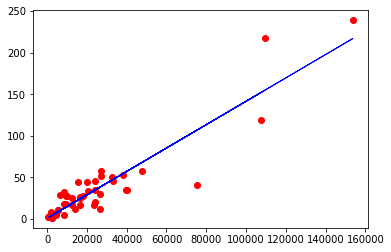

In [67]:
regr = linear_model.LinearRegression()


vc = np.array([state_pop['violent_crimes']]).T
k = np.array([state_pop['killings']]).T
regr.fit(vc, k)

plt.scatter(vc, k,  color='red')
plt.plot(vc, regr.predict(vc), color='blue',
         linewidth=1)
